In [30]:
from paddleocr import PaddleOCR, draw_ocr

# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(
    use_angle_cls=True,
    rec=True,
    lang="ru",
    rec_algorithm='SVTR_LCNet', 
    rec_model_dir='./inference/svtr_kz',
    rec_char_dict_path='/home/bma/bma/PaddleOCR_Mukhtar/ppocr/utils/dict/kz_dict.txt',
)  # need to run only once to download and load model into memory

[2023/07/09 20:12:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/bma/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./inference/svtr_kz', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/home/bma/bma/Pad

In [39]:
img_path = './train_data/0_002_007.jpg'
result = ocr.ocr(img_path,  rec=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[2023/07/09 20:15:36] ppocr DEBUG: dt_boxes num : 2, elapse : 0.018216371536254883
[2023/07/09 20:15:36] ppocr DEBUG: cls num  : 2, elapse : 0.005685567855834961
[2023/07/09 20:15:36] ppocr DEBUG: rec_res num  : 2, elapse : 0.13126301765441895
[[[3.0, 1.0], [128.0, 4.0], [127.0, 27.0], [2.0, 24.0]], ('санық', 0.9753586053848267)]
[[[128.0, 6.0], [192.0, 6.0], [192.0, 23.0], [128.0, 23.0]], ('ты', 0.8119300603866577)]


In [40]:
result = result[0]

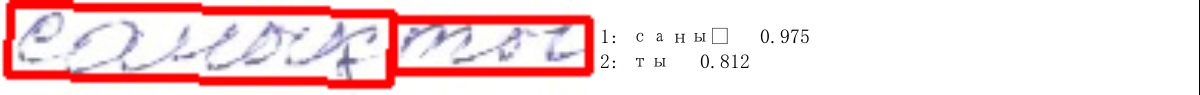

In [42]:
# draw result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
# rotate image 90 degrees
im_show = draw_ocr(image, boxes, txts, scores)
im_show = Image.fromarray(im_show )

# show image in jupyter
im_show.show()